In [167]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, deltaE_cie76,lab2rgb



In [157]:
x=pd.read_csv("pro_color_time_for_ts.csv")

In [159]:
y=x['41']/x['tot']
time=x['time']

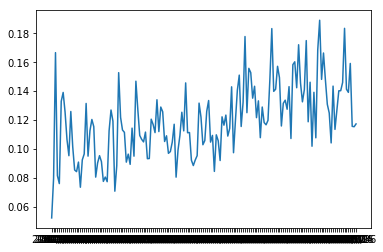

In [160]:

plt.plot(time,y)

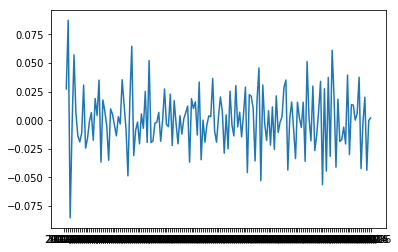

In [17]:
plt.plot(time,y.diff())

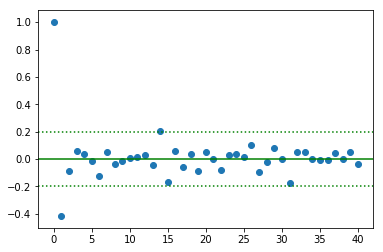

In [40]:
af=acf(y.diff()[2:])
#plt.scatter(range(160),pcf)
plt.scatter(range(41),af)
plt.axhline(y=0.2,color='green',ls=":")
plt.axhline(y=-0.2,color='green',ls=":")
plt.axhline(y=0,color='green')

In [62]:
result = adfuller(y.diff()[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -5.726486
p-value: 0.000001


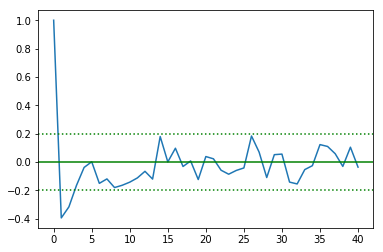

In [46]:
yd=y.diff()[1:]
plt.plot(pacf(yd))
plt.axhline(y=0.2,color='green',ls=":")
plt.axhline(y=-0.2,color='green',ls=":")
plt.axhline(y=0,color='green')

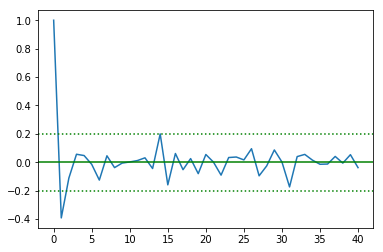

In [47]:
plt.plot(acf(yd))
plt.axhline(y=0.2,color='green',ls=":")
plt.axhline(y=-0.2,color='green',ls=":")
plt.axhline(y=0,color='green')

In [50]:
model = ARIMA(y, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  159
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 391.724
Method:                       css-mle   S.D. of innovations              0.020
Date:                Sun, 14 Jun 2020   AIC                           -775.448
Time:                        22:34:10   BIC                           -763.173
Sample:                             1   HQIC                          -770.463
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   4.48e-05      7.138      0.000       0.000       0.000
ar.L1.D.y      0.2289      0.079      2.897      0.004       0.074       0.384
ma.L1.D.y     -1.0000      0.022    -46.174      0.0

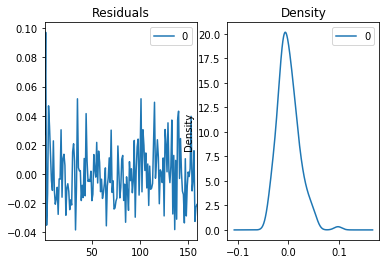

In [51]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

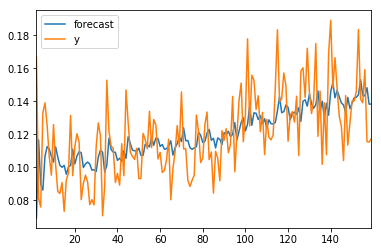

In [55]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [53]:
model_fit.plot_predict?

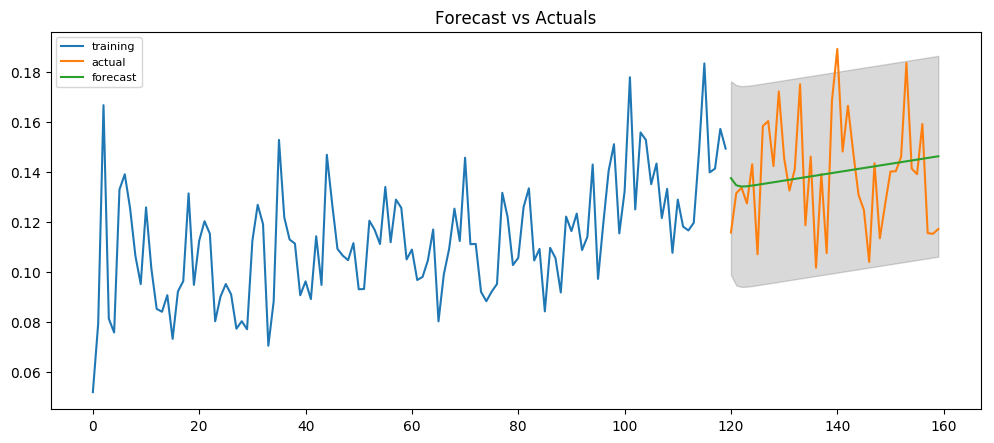

In [60]:
train=y[:120]
test=y[120:]
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(40, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [102]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'mape': 0.130062769103318,
 'me': 0.0008531230405953077,
 'mae': 0.017488943306307823,
 'mpe': 0.03080694919929925,
 'rmse': 0.022139083936639145,
 'acf1': 0.15733271844866417,
 'corr': -0.0716264649076016,
 'minmax': 0.11460017334464823}

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose#
#yd=x[['time','41']]
#yd['41']=x['41']/x['tot']
#yd['time']=pd.to_datetime(yd['time'])
#yd.set_index('time')
s=seasonal_decompose(y, period=8)

In [83]:
#s.plot()

In [95]:
from scipy.fft import dct
f=dct(y,type=2)

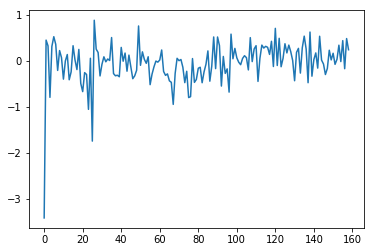

In [101]:
plt.plot(f[1:])
#plt.xlim(0,5)

In [104]:
xx=pd.read_csv("color_pop_time_nyc_pattern_all.csv")

In [107]:
xx.shape

(154, 139)

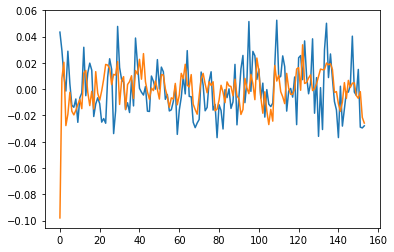

In [130]:
y=(x['41']/x['tot'])[6:]
time=x['time']
yy=xx['41']/xx['tot']
plt.plot(range(154),y-(reg.coef_*range(154)+reg.intercept_))
plt.plot(range(154),yy-yy.mean())

In [124]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.arange(154).reshape(-1, 1) , y)

In [127]:
reg.coef_

array([0.00032317])

In [128]:
reg.intercept_

0.0957451671928783

In [131]:
project=y-(reg.coef_*range(154)+reg.intercept_)
design=yy-yy.mean()

In [135]:
np.corrcoef(project,design)

array([[1.        , 0.14915788],
       [0.14915788, 1.        ]])

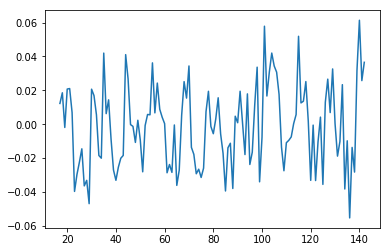

In [151]:
n=17
plt.plot(project[:-n]-design[n:])

In [152]:
dat=pd.read_csv("project_pop_color_200.csv")

In [154]:
dat.sort_values(by='time')

,Unnamed: 0,Unnamed: 0.1,project_id,time,0,1,2,3,4,5,...,939,940,941,942,943,944,945,946,947,948
31114,165,165,266,2007/03/07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3584,152,152,271,2007/03/08,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35307,183,183,320,2007/03/13,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
31470,154,154,319,2007/03/13,216.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31293,158,158,318,2007/03/13,331.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8255,152,152,359,2007/03/19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8440,158,158,361,2007/03/19,560.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8077,161,161,356,2007/03/19,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18347,147,147,358,2007/03/19,28.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9695,163,163,357,2007/03/19,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


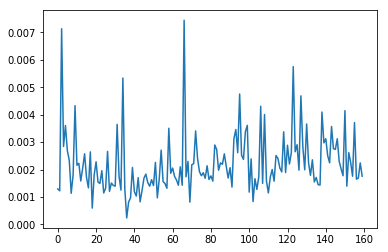

In [162]:
y=x['0']/x['tot']
time=x['time']
plt.plot(y)